# Analyzing Presidential Debates

## Group Members - Purvi Thakor, Junior Ovince, Akshay Kamath
<br>
With the midterms around the corner & politics dominating the news, we decided to analyze Presidential debates for our NLP project. We found datasets available on [UC Barbara's The American Presidency Project](https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/presidential-candidates-debates-1960-2016).

We discussed & decided to analyze the presidential debates from 2008 onwards which meant we worked on 3 sets of debates - 

* <font color=blue>Obama<font color=black> v <font color=red>McCain<font color=black> _(2008)_
  -  [Presidential Debate in Hempstead, New York](https://www.presidency.ucsb.edu/ws/index.php?pid=84526)
  -  [Presidential Debate in Nashville, Tennessee](https://www.presidency.ucsb.edu/ws/index.php?pid=84482)
  -  [Presidential Debate in Oxford, Mississippi](https://www.presidency.ucsb.edu/ws/index.php?pid=78691)
<br>
<br>
* <font color=blue>Obama<font color=black> v <font color=red>Romney<font color=black> _(2012)_
  -  [Presidential Debate at Lynn University in Boca Raton, Florida](https://www.presidency.ucsb.edu/ws/index.php?pid=102344)
  -  [Presidential Debate at Hofstra University in Hempstead, New York](https://www.presidency.ucsb.edu/ws/index.php?pid=102343)
  -  [Presidential Debate at the University of Denver, Colorado](https://www.presidency.ucsb.edu/ws/index.php?pid=102317)
<br>
<br>
* <font color=blue>Clinton<font color=black> v <font color=red>Trump<font color=black> _(2016)_
  -  [Presidential Debate at the University of Nevada, Las Vegas](https://www.presidency.ucsb.edu/ws/index.php?pid=119039)
  -  [Presidential Debate at Washington University in St. Louis, Missouri](https://www.presidency.ucsb.edu/ws/index.php?pid=119038)
  -  [Presidential Debate at Hofstra University in Hempstead, New York](https://www.presidency.ucsb.edu/ws/index.php?pid=119012)
<br>
<br>
    
Furthermore, we decided to analyze both the victory & concession speeches for all the candidates.
    


## Preprocessing

The data was manually scraped from the abovementioned site & stored in text files. Thankfully, the format across each of the documents was more or less the same & we ended up saving a lot of time in the initial few steps. 

In [1]:
import pandas as pd
import os
import re
import tabulate
import string
import matplotlib.pyplot as plt

from nltk.stem import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
print(os.getcwd())

C:\Users\akkif\NLP\finalproject


In [3]:
wrkdir = os.chdir("D:/Project/NLP/presidential_debates/")

def read_file(filename):
    input_file_text = open(filename).read()
    return input_file_text

file_list=[]
for file in os.listdir(wrkdir):
    file_list.append(file) 

file_list

['2008_obama_v_mccain_hofstra_university_NY.txt',
 '2008_obama_v_mccain_university_of_nashville_TN.txt',
 '2008_obama_v_mccain_university_of_oxford_MS.txt',
 '2012_obama_v_romney_hofstra_university_NY.txt',
 '2012_obama_v_romney_lynn_university_FL.txt',
 '2012_obama_v_romney_university_of_denver_CO.txt',
 '2016_trump_v_clinton_hofstra_university_NY.txt',
 '2016_trump_v_clinton_university_of_nevada_NV.txt',
 '2016_trump_v_clinton_washington_university_MO.txt']

In [4]:
for i in file_list:
    file = open(i,'rt')
    file_read = file.read()
    print("\n")
    print(125*"+")
    print(file.name)
    print(125*"+")
    print("\n")
    file.close()
    print(file_read)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


SCHIEFFER: Good evening. And welcome to the third and last presidential debate of 2008, sponsored by the Commission on Presidential Debates. I'm Bob Schieffer of CBS News.

The rules tonight are simple. The subject is domestic policy. I will divide the next hour-and-a-half into nine-minute segments.

I will ask a question at the beginning of each segment. Each candidate will then have two minutes to respond, and then we'll have a discussion.

I'll encourage them to ask follow-up questions of each other. If they do not, I will.

The audience behind me has promised to be quiet, except at this moment, when we welcome Barack Obama and John McCain.

Gentlemen, welcome.

By now, we've heard all 

As we can see, the format of the files is slightly different. Initially, the conversation begins with the speaker's name in proper format & then it gets converted to upper format. So we realized that each document needs to be cleansed separately.

### 1) 2008 Presidential Debate Data Cleaning

In [5]:
all_files = []

for i in file_list:
    if '2008' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2008_obama_v_mccain_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


SCHIEFFER: Good evening. And welcome to the third and last presidential debate of 2008, sponsored by the Commission on Presidential Debates. I'm Bob Schieffer of CBS News.The rules tonight are simple. The subject is domestic policy. I will divide the next hour-and-a-half into nine-minute segments.I will ask a question at the beginning of each segment. Each candidate will then have two minutes to respond, and then we'll have a discussion.I'll encourage them to ask follow-up questions of each other. If they do not, I will.The audience behind me has promised to be quiet, except at this moment, when we welcome Barack Obama and John McCain.Gentlemen, welcome.By now, we've heard all the talking 

In [6]:
string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('McCain:','MCCAIN:') #replacing one instance of proper string with upper
file_read2 = file_read1.replace('Obama:','OBAMA:') #replacing one instance of proper string with upper
JM_2008 = re.findall(r'MCCAIN:(.*?)(?:OBAMA:|LEHRER:|SCHIEFFER:|BROKAW:)', file_read2) #extracting comments made by McCain only
BO_2008 = re.findall(r'OBAMA:(.*?)(?:MCCAIN:|LEHRER:|SCHIEFFER:|BROKAW:)', file_read2) #extracting comments made by Obama only

In [7]:
JM_2008_wc = ''.join(JM_2008)
BO_2008_wc = ''.join(BO_2008)
print("Barack Obama's word count in the 2008 presidential debates is " + str("{:,}".format(len(BO_2008_wc))) + " words.")
print("John McCain's word count in the 2008 presidential debates is " + str("{:,}".format(len(JM_2008_wc))) + " words.")

Barack Obama's word count in the 2008 presidential debates is 121,759 words.
John McCain's word count in the 2008 presidential debates is 112,023 words.


### 2) 2012 Presidential Debate Data Cleaning

In [8]:
all_files = []

for i in file_list:
    if '2012' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2012_obama_v_romney_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Moderator Candy Crowley. Good evening from Hofstra University in Hempstead, New York. I'm Candy Crowley from CNN's "State of the Union."We are here for the second Presidential Debate, a town hall sponsored by the Commission on Presidential Debates. The Gallup organization chose 82 uncommitted voters from the New York area. Their questions will drive the night. My goal is to give the conversation direction and to ensure questions get answered.The questions are known to me and my team only. Neither the commission, nor the candidates have seen them. I hope to get to as many questions as possible, and because I am the optimistic sort, I'm sure the candidates will oblige by keeping their answer

In [9]:
string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('Gov. Romney.',' ROMNEY:') #replacing all instances of proper string with upper
file_read2 = file_read1.replace('The President.',' OBAMA:') #replacing all instances of proper string with upper
file_read3 = file_read2.replace('Mr. Lehrer.',' LEHRER:') #replacing all instances of proper string with upper
file_read4 = file_read3.replace('Mr. Schieffer.',' SCHIEFFER:') #replacing all instances of proper string with upper
file_read5 = file_read4.replace('Ms. Crowley.',' CROWLEY:') #replacing all instances of proper string with upper
file_read5
MR_2012 = re.findall(r' ROMNEY:(.*?)(?:OBAMA:| LEHRER:| SCHIEFFER:| CROWLEY:)', file_read5) #extracting comments made by Romney only
BO_2012 = re.findall(r' OBAMA:(.*?)(?:ROMNEY:| LEHRER:| SCHIEFFER:| CROWLEY:)', file_read5) #extracting comments made by Obama only

In [10]:
MR_2012_wc = ''.join(MR_2012)
BO_2012_wc = ''.join(BO_2012)
print("Barack Obama's word count in the 2012 presidential debates is " + str("{:,}".format(len(BO_2012_wc))) + " words.")
print("Mitt Romney's word count in the 2012 presidential debates is " + str("{:,}".format(len(MR_2012_wc))) + " words.")

Barack Obama's word count in the 2012 presidential debates is 124,529 words.
Mitt Romney's word count in the 2012 presidential debates is 124,418 words.


### 3) 2016 Presidential Debate Data Cleaning

In [11]:
all_files = []

for i in file_list:
    if '2016' in i:
        file = open(i,'rt')
        file_read = file.read()
        file_read = file_read.replace('\n', '')
        all_files.append(file_read)
        print("\n")
        print(125*"+")
        print(file.name)
        print(125*"+")
        print("\n")
        file.close()
        print(file_read)



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2016_trump_v_clinton_hofstra_university_NY.txt
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


HOLT: Good evening from Hofstra University in Hempstead, New York. I'm Lester Holt, anchor of "NBC Nightly News." I want to welcome you to the first presidential debate.The participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight's format, and the rules have been agreed to by the campaigns.The 90-minute debate is divided into six segments, each 15 minutes long. We'll explore three topic areas tonight: Achieving prosperity; America's direction; and securing America. At the start of each segment, I will ask the same lead-off question to both candidates,

In [12]:
string_files = ' '.join(all_files) #converting list to string
cleaned_files = string_files.replace('\n\n','') #replacing new line tags
file_read1 = cleaned_files.replace('Trump:',' TRUMP:') #replacing all instances of proper string with upper
file_read2 = file_read1.replace('Clinton:',' CLINTON:') #replacing all instances of proper string with upper
file_read3 = file_read2.replace('Holt:',' HOLT:') #replacing all instances of proper string with upper
file_read4 = file_read3.replace('Wallace:',' WALLACE:') #replacing all instances of proper string with upper
file_read5 = file_read4.replace('Raddatz:',' RADDATZ:') #replacing all instances of proper string with upper
file_read6 = file_read5.replace('Cooper:',' COOPER:') #replacing all instances of proper string with upper
DT_2016 = re.findall(r'TRUMP:(.*?)(?:CLINTON:|HOLT:|WALLACE:|RADDATZ:|COOPER:)', file_read6) #extracting comments made by Trump only
HC_2016 = re.findall(r'CLINTON:(.*?)(?:TRUMP:|HOLT:|WALLACE:|RADDATZ:|COOPER:)', file_read6) #extracting comments made by Clinton only


In [13]:
DT_2016_wc = ''.join(DT_2016)
HC_2016_wc = ''.join(HC_2016)
print("Donald Trump's word count in the 2016 presidential debates is " + str("{:,}".format(len(DT_2016_wc))) + " words.")
print("Hillary Clinton's word count in the 2016 presidential debates is " + str("{:,}".format(len(HC_2016_wc))) + " words.")

Donald Trump's word count in the 2016 presidential debates is 121,193 words.
Hillary Clinton's word count in the 2016 presidential debates is 106,863 words.


## Initial Observations

<br>
Without discarding any information, on a very superficial level, we can see that Obama has had the highest word count in a presidential debate followed by Romney in 2012.
<br>

| Year | Nominee | Word Count |
| --- | --- | --- |
| 2008 | <font color=blue>Obama<font color=black> | **121,759** |
| 2008 | <font color=red>McCain<font color=black> | 112,023 |
| 2012 | <font color=blue>Obama<font color=black> | **124,529** |
| 2012 | <font color=red>Romney<font color=black> | 124,418 |
| 2016 | <font color=blue>Clinton<font color=black> | 106,863 |
| 2016 | <font color=red>Trump<font color=black> | **121,193** |
 

## Analyzing the Presidential debates

In [14]:
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [18]:
def cleaned_data(data):
    data = "".join(data)
    data = word_tokenize(data)
    data = [w for w in data if not w in stop_words]
    wc_lst = len(data)
    return wc_lst

In [19]:
wc_files = [BO_2008,JM_2008,BO_2012,MR_2012,HC_2016,DT_2016]
lst = ['Obama (2008)','McCain (2008)','Obama (2012)','Romney (2012)','Clinton (2016)','Trump (2016)']

wc = []
for i in wc_files:
    wc_vals = cleaned_data(i)
    wc.append(wc_vals)

word_count = pd.DataFrame({'Nominee':lst,'Words':wc})
word_count

,Nominee,Words
0,Obama (2008),14336
1,McCain (2008),13590
2,Obama (2012),14825
3,Romney (2012),15612
4,Clinton (2016),13090
5,Trump (2016),16320


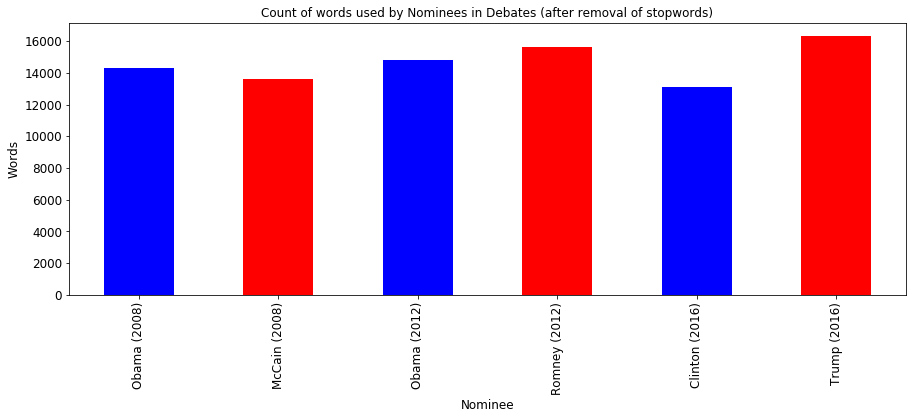

In [29]:
ax = word_count.plot(kind='bar',x='Nominee',y='Words',figsize=(15,5),legend = True, fontsize = 12,color=['blue', 'red', 'blue', 'red', 'blue', 'red'])
ax.set_xlabel("Nominee", fontsize=12)
ax.set_ylabel("Words", fontsize=12)
ax.get_legend().remove()
ax.set_title('Count of words used by Nominees in Debates (after removal of stopwords)')
plt.show()